**[2025-2] NG-인공지능프로그래밍기초 Take-Home Final Project**

Duration: 1 day (24 hours)

Type: Take-home

아래의 instruction에 따라 코딩 과제를 수행하여 코드 파일을 제출하고, 간단하게 과제 내용과 결과를 요약하여 10페이지 이내의 report를 작성해 pdf 파일 형태로 제출합니다.
- 필요 시 수업에서 다룬 코드/함수가 아닌 기능을 사용하는 것도 가능합니다.
- 다만 해당 내용을 보고서에서 간단히 설명하세요.


## Part 1: Data Preprocessing (30 points)
* Dataset
  - Use the provided dataset 'StudentsPerformance.csv': columns are 'math_score', 'reading_score', 'writing_score', 'gender', 'lunch', 'parental_education_level'.

* Task:
  - Load the dataset and display the first 10 rows. (5 points)
  - Check for missing values in the dataset and confirm data types. Handle missing values if necessary. (5 points)
  - Perform the following data transformations: (10 points)
    - Encode categorical variables using one-hot encoding.
    - Normalize the numerical columns to a range of [0,1].
  - Visualize the distributionof the 'math_score' column using a hitogram. Provide insights based on the visualization. (10 points)


In [2]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [3]:
# Load the dataset
df = pd.read_csv('StudentsPerformance.csv')

# Display the first 10 rows
print("First 10 rows of the dataset:")
display(df.head(10))


First 10 rows of the dataset:


,gender,parental_education_level,lunch,math_score,reading_score,writing_score
0,female,bachelor's degree,standard,72,72,74
1,female,some college,standard,69,90,88
2,female,master's degree,standard,90,95,93
3,male,associate's degree,free/reduced,47,57,44
4,male,some college,standard,76,78,75
5,female,associate's degree,standard,71,83,78
6,female,some college,standard,88,95,92
7,male,some college,free/reduced,40,43,39
8,male,high school,free/reduced,64,64,67
9,female,high school,free/reduced,38,60,50


In [5]:
# Check for missing values and data types

print("\nData Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

df = df.dropna()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    1000 non-null   object
 1   parental_education_level  1000 non-null   object
 2   lunch                     1000 non-null   object
 3   math_score                1000 non-null   int64 
 4   reading_score             1000 non-null   int64 
 5   writing_score             1000 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 47.0+ KB
None

Missing Values:
gender                      0
parental_education_level    0
lunch                       0
math_score                  0
reading_score               0
writing_score               0
dtype: int64


In [7]:
# Perform one-hot encoding for categorical columns

## Categorical columns: 'gender', 'lunch', 'parental_education_level'
categorical_cols = ['gender', 'lunch', 'parental_education_level']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


# Normalize numerical columns


## Numerical columns: 'math_score', 'reading_score', 'writing_score'
numerical_cols = ['math_score', 'reading_score', 'writing_score']
scaler = MinMaxScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])



In [10]:
# Display the transformed dataset

print("\nFirst 5 rows of the transformed dataset:")
display(df_encoded.head())



First 5 rows of the transformed dataset:


,math_score,reading_score,writing_score,gender_male,lunch_standard,parental_education_level_bachelor's degree,parental_education_level_high school,parental_education_level_master's degree,parental_education_level_some college,parental_education_level_some high school
0,0.72,0.662651,0.711111,False,True,True,False,False,False,False
1,0.69,0.879518,0.866667,False,True,False,False,False,True,False
2,0.90,0.939759,0.922222,False,True,False,False,True,False,False
3,0.47,0.481928,0.377778,True,False,False,False,False,False,False
4,0.76,0.734940,0.722222,True,True,False,False,False,True,False


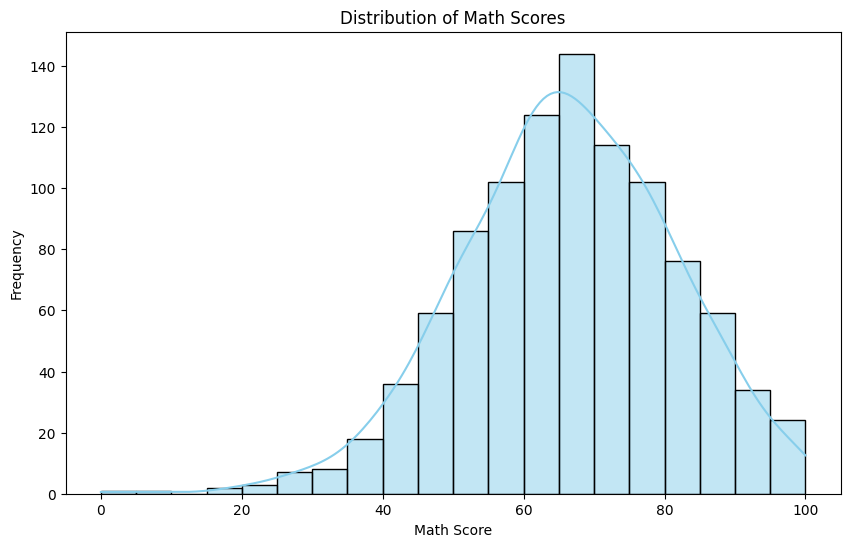

In [9]:
# Visualization of math_score distribution

plt.figure(figsize=(10, 6))
sns.histplot(df['math_score'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

## Part 2: Model Implementation (40 points)
* Classification problem:
  - Use the pre-processed dataset to predict whether a student's performance (of 'math_score') is above 70 (label "1") or below 70 (label "0") based on theri scores and other features.

* Tasks:
  - Create a new binary column, 'performance_level', where "1" indicates students with a 'math_score' of 70 or above and "0" otherwise.
  - Split the dataset into training (80%) and test (20%) sets. (5 points)
  - Train the following models using Scikit-Learn: (10 points)
    - Logistic Regression
    - Decision Tree Classifier
  - Evaluate each model on the test set using (10 points)
    - Accuracy
    - Precision, Recall, and F1-score
  - Create a confusion matrix for both models and visualize it. (10 points)
  - Based on the evaluation metrics, determin which model performs better and explain why. (5 points)

In [11]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [12]:
# Assuming 'df_encoded' is the preprocessed dataset from Part 1
# Create a new binary column for performance level

# "1" indicates students with a 'math_score' of 70 or above, "0" otherwise.
# We use the original 'df' to create this label based on the unscaled math score.
df_encoded['performance_level'] = df['math_score'].apply(lambda x: 1 if x >= 70 else 0)

In [13]:
# Split into features (X) and target (y)

X = df_encoded.drop(columns=['performance_level'])
y = df_encoded['performance_level']

# Split into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Train Logistic Regression model

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [15]:
# Train Decision Tree Classifier


dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [16]:
# Evaluate models

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"\n--- {model_name} Evaluation ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    return y_pred

In [17]:
# Print evaluation metrics for both models: accuracy, precision, recall, f1-score

y_pred_log = evaluate_model(log_reg, X_test, y_test, "Logistic Regression")
y_pred_dt = evaluate_model(dt_clf, X_test, y_test, "Decision Tree Classifier")


--- Logistic Regression Evaluation ---
Accuracy: 0.9550
Precision: 0.9367
Recall: 0.9487
F1-score: 0.9427

--- Decision Tree Classifier Evaluation ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


Text(145.72222222222223, 0.5, 'True Label')

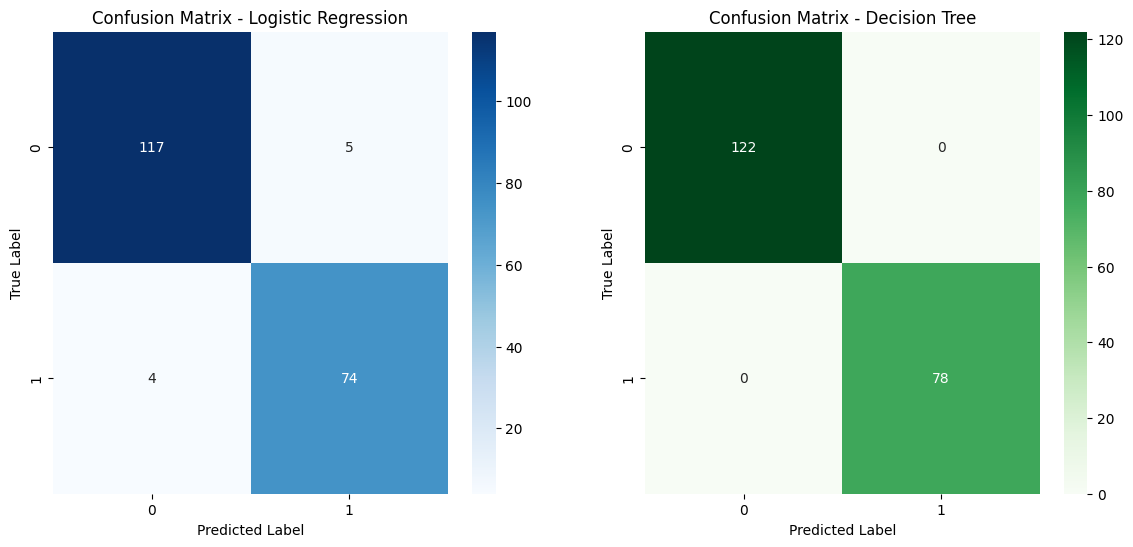

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Confusion Matrix for Decision Tree Classifier
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Confusion Matrix - Decision Tree')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

# Confusion Matrix for Logistic Regression

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')


## Part 3: Clustering (30 points)

Clustering task:
  * Dataset: this dataset contains Google review ratings for 24 categories of attractions across Europe. The ratings range from 1 to 5.
    - It includes review ratings from a total of 5456 users for 24 categores of attractions.
    - Each data entry represents the average review ratings of one user across 24 categories.
    - From these, we select only the review ratings for "churches" and "museums" to cluster the 5456 users using K-means clustering.

Task:
  * Visualize the data (5 points):
    - Plot the data as a scatter plot, using the ratings for churches as the x-axis and the ratings for museums as the y-axis.
  * Perform K-means clustering (10 points):
    - Create a K-means model object and train it on the data. Set the number of clusters K=5.
  * Visualize clustering results (10 points):
    - Plot the clustering results, using different colors and markers for each cluster. Also, display the cluster centroids on the plot.
  * Interpret the clustering results (5 points):
    - What do the clusters represent?
    - How can this information be useful for identifying student groups?
  
  


In [23]:
# import

from sklearn.cluster import KMeans

In [25]:
# load dataset:
# kaggle에서 google review rating 데이터셋을 다운로드하는 코드
!%pip install kaggle
!kaggle datasets download -d wirachleelakiatiwong/travel-review-rating-dataset
!unzip travel-review-rating-dataset.zip

zsh:fg:1: no job control in this shell.


zsh:1: command not found: kaggle
unzip:  cannot find or open travel-review-rating-dataset.zip, travel-review-rating-dataset.zip.zip or travel-review-rating-dataset.zip.ZIP.


In [28]:
"""
이 데이터 세트는 유럽 전역의 24개 범주의 명소에 대한 총 5456 명 사용자의 구글 리뷰 별점으로 이루어져 있습니다.
별점 범위는 1에서 5입니다.
"""

cat = """user
churches
resorts
beaches
parks
theatres
museums
malls
zoo
restaurants
pubs/bars
local services
burger/pizza shops
hotels/other lodgings
juice bars
art galleries
dance clubs
swimming pools
gyms
bakeries
beauty & spas
cafes
view points
monuments
gardens"""
columns_list = cat.split("\n")

# csv를 읽어들여 dataframe으로 변환하는 코드.
import pandas as pd
df = pd.read_csv('./google_review_ratings.csv',header=0, names = columns_list, index_col=False)
df = df.set_index('user')
df.head()

/tmp/ipykernel_635486/3288764132.py:35: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv('./google_review_ratings.csv',header=0, names = columns_list, index_col=False)


,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
user,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


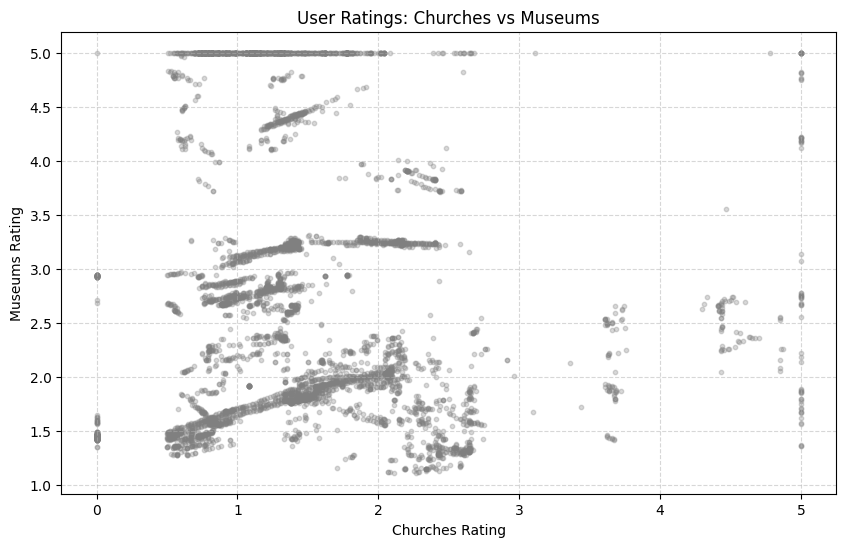

In [30]:
# TODO
# 교회에 대한 별점을 가로축으로, 박물관에 대한 별점을 세로축으로 하여 데이터를 scatter로 시각화 하세요.

X = df[['churches', 'museums']].apply(pd.to_numeric, errors='coerce').dropna()

plt.figure(figsize=(10, 6))
plt.scatter(X['churches'], X['museums'], s=10, alpha=0.3, color='gray')
plt.title('User Ratings: Churches vs Museums')
plt.xlabel('Churches Rating')
plt.ylabel('Museums Rating')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [31]:
# TODO
# k-means 군집화를 위한 모델 객체를 생성하고, 학습을 수행하세요. cluster 개수는 5로 설정합니다.

kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans.fit(X)

# 학습된 레이블(어느 그룹에 속하는지)과 중심점(Centroid) 가져오기
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


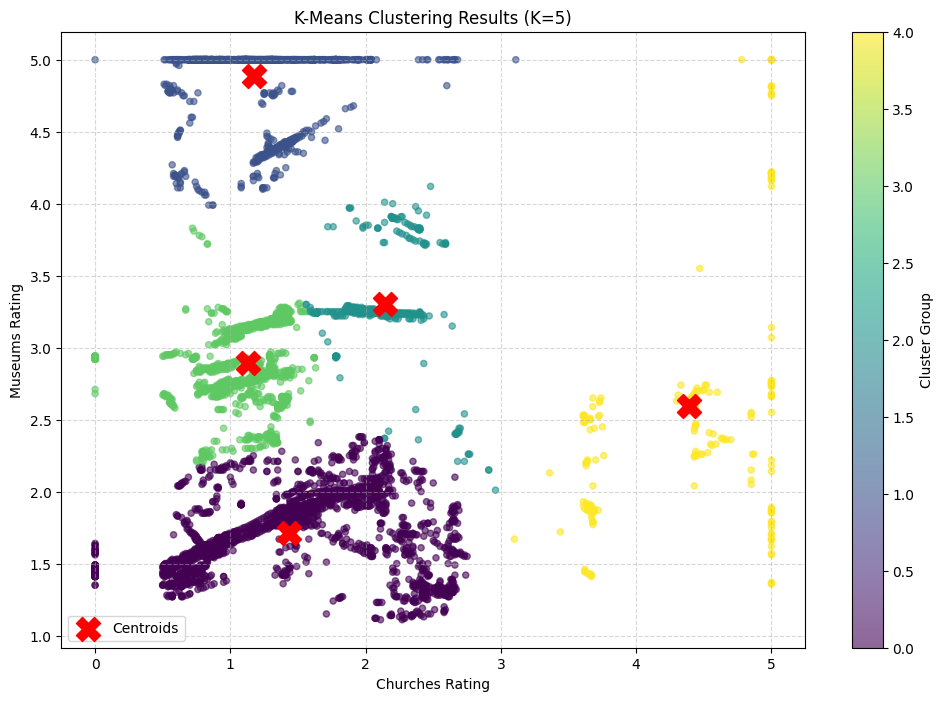

In [32]:
# TODO
# k-means 군집화 결과를 시각화하세요. 클러스터 별로 다른 색/marker를 사용하고, 클러스터의 중심점도 표시합니다.


plt.figure(figsize=(12, 8))

# 1. 클러스터링 결과 산점도 그리기 (c=labels 옵션으로 그룹별 색상 자동 지정)
scatter = plt.scatter(X['churches'], X['museums'], c=labels, cmap='viridis', s=20, alpha=0.6)

# 2. 클러스터의 중심점(Centroid) 표시 (빨간색 X 마커)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title('K-Means Clustering Results (K=5)')
plt.xlabel('Churches Rating')
plt.ylabel('Museums Rating')
plt.colorbar(scatter, label='Cluster Group') # 우측에 색상 바 표시
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()